In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("data/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


Text(0.5, 1.0, 'Rings')

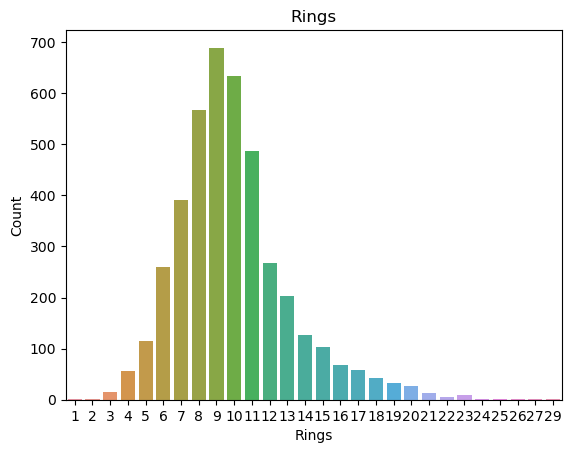

In [3]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [4]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [5]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

문자열로 되어있는 '성별' 열을 숫자로 바꿔준다

In [7]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [8]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


X와 y 생성

In [9]:
X = df.drop('Rings', axis=1)
y = df['Rings']

# 머신러닝 분류하기

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## SVM

In [12]:
from sklearn.svm import SVC


clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_svm))
print("f1_score")
print(f1_score(y_test, pred_svm, average='weighted'))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
accuracy
0.25478468899521534
f1_score
0.2091165179780771
[[ 0  3  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0 22  3  0  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 26 10  4  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 25 23 18 31  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6 48 49  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 26 69 25  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2 12 47 31 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 12 35 33 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3 28 25  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 17 13  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 13  7  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6

## LR

In [13]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_lr))
print("f1_score")
print(f1_score(y_test, pred_lr, average='weighted'))
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
accuracy
0.26913875598086123
f1_score
0.22207487596936512
[[ 0  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 25  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 17 18  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 32 38 17  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  9 52 41  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 22 67 29  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 14 34 38 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 15 26 30 18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7 19 25 13  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7  3 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  9 10  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4 10  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 

C:\Users\topic\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## NN

In [14]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_nn))
print("f1_score")
print(f1_score(y_test, pred_nn, average='weighted'))
print(confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
accuracy
0.26435406698564595
f1_score
0.23598697132485333
[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  6  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6 10 13  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 20 11  6  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 23 28 33  9  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  2 17 48 33 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 27 53 33  4  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 11 35 35 18  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  9 24 37 18  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  4 19 21 15  0  3  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2  0 21 11  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5 10  2  0  4  0  2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 10  4  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0

C:\Users\topic\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## DT

In [15]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_dt))
print("f1_score")
print(f1_score(y_test, pred_dt, average='weighted'))
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
accuracy
0.2021531100478469
f1_score
0.20201242245692136
[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  8 10  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 11 15  8  1  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 18 30 29 10  3  3  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  8 16 28 22 19 10  0  3  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7 28 29 24 15  6  7  0  4  1  0  1  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 15 23 22 21  5  6  4  1  1  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 11 16 23 16  7  6  1  4  0  2  3  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  9 13 11  8  7  2  3  1  3  1  1  2  0  2  1  0  1  0  0]
 [ 0  0  0  0  0  1  7  6 10  4  4  3  0  1  0  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  3  2  4  3  5  0  2  1  2  1  0  1  1  0  0  0  0  0  0]
 [ 0  0  

## RF

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
print("accuracy")
print(accuracy_score(y_test, pred_rf))
print("f1_score")
print(f1_score(y_test, pred_rf, average='weighted'))
print(confusion_matrix(y_test, pred_rf))


--- Radom Forest ---
accuracy
0.2332535885167464
f1_score
0.2203954088095663
[[ 1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7 10  9  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 17 15  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 24 28 30  9  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  2 14 46 28 13  3  2  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 31 33 36 10  3  3  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 12 30 26 20  5  4  0  1  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  9 30 29 21  0  2  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 10 15 17 11  5  1  2  1  2  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  2  7  8 12  3  1  2  0  0  1  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  6  4  3  0  1  2  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  5  6  1  0  1  0  0  2  0  0  0  0

# 훈련, 테스트 데이터를 나눌 때 random_state 값을 변경하고, 데이터를 정규화 하여 재분류

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

#데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## SVM

In [19]:
from sklearn.svm import SVC


clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_svm))
print("f1_score")
print(f1_score(y_test, pred_svm, average='weighted'))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
accuracy
0.2942583732057416
f1_score
0.2563138476882608
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  7 14  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 15 22  7  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10 37 27 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 10 44 33  8  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 12 28 58 37  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 21 41 53 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  6 24 36 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  2 14 18 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  2  6 13  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 11  7  4  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8 11  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  8  4  0  0  0  0  0  0  0  0  0  0  0 

## LR

In [20]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_lr))
print("f1_score")
print(f1_score(y_test, pred_lr, average='weighted'))
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
accuracy
0.2751196172248804
f1_score
0.24847519308649163
[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 10 11  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4 13 20  9  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  9 30 33 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  8 46 32 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2 10 31 58 32  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 19 44 38 23  2  3  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  8 28 25 25  1  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  5 10 15 14  0  5  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  2  4  2 12  9  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6 11  4  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  6  5  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  2  3  1  4  0  1  0  

## NN

In [21]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_nn))
print("f1_score")
print(f1_score(y_test, pred_nn, average='weighted'))
print(confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
accuracy
0.2942583732057416
f1_score
0.27876699198052696
[[ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  8 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 18 16  5  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 13 35 20 12  1  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 11 42 29 10  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  8 24 61 33 10  4  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 16 46 36 22  3  7  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  3 26 25 25  3  6  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  1  8 12 16  3  5  1  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  2  2  7  9  4  3  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  9  3  2  7  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  6  1  3  7  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  1  3  1  0  2  3  0 

## DT

In [22]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print("accuracy")
print(accuracy_score(y_test, pred_dt))
print("f1_score")
print(f1_score(y_test, pred_dt, average='weighted'))
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
accuracy
0.19856459330143542
f1_score
0.1990870316695413
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  5  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  9  7  8  2  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8 14  9 13  1  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 20 18 21 10  4  3  1  1  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  4 14 26 20 20  3  6  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  9 22 32 32 21  7  5  4  3  2  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  2 19 32 28 21 10  8  5  4  3  2  0  2  2  0  0  0  0]
 [ 0  0  0  0  1  4  3 21 20 21  7  7  3  1  1  1  0  2  0  1  0  0  0]
 [ 0  0  0  0  0  2  4  3 12  7  5  5  2  1  4  2  0  0  3  0  0  1  0]
 [ 0  0  0  0  1  0  3  4  1  5  3  4  3  4  1  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  2  5  0  6  5  1  1  2  

## RF

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)
print("accuracy")
print(accuracy_score(y_test, pred_rf))
print("f1_score")
print(f1_score(y_test, pred_rf, average='weighted'))
print(confusion_matrix(y_test, pred_rf))


--- Radom Forest ---
accuracy
0.2631578947368421
f1_score
0.25041490659874227
[[ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  6  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 10 12  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6 14 15 10  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2 16 26 23 12  1  2  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  3 16 37 28 10  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 31 47 34 16  3  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 16 41 37 23  7  5  0  0  3  1  0  0  0  0  0  0]
 [ 0  0  0  0  3  6 21 23 30  3  5  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  6  6 11 14  6  4  0  0  2  0  0  0  1  0  0  0]
 [ 0  0  0  1  1  3  2 10  6  4  2  1  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  8  4  6  2  0  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  5  3  1  4  2  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  4  2  0  1  1  1  0  0  0  0  0  

SVM, LR, NN, RF 머신러닝은 데이터에 민감하게 반응하기 때문에
random_state 값 변경에 따른 데이터셋 변화와 데이터 정규화에 따라
정확도가 유의미하게 상승한 것을 볼 수 있다.
(단, random_state 값 변경에 따른 상승은 해당 분류에 사용된 데이터의 양이 굉장히 적기 때문에 발생한 것.)

하지만 DT(결정 트리)는 데이터의 구조적 패턴을 학습하여 분류를 수행하는 머신러닝 알고리즘이기 때문에
데이터의 변경과 정규화에 반응하지 않은 것을 볼 수 있다.

# 머신러닝 회귀

In [24]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


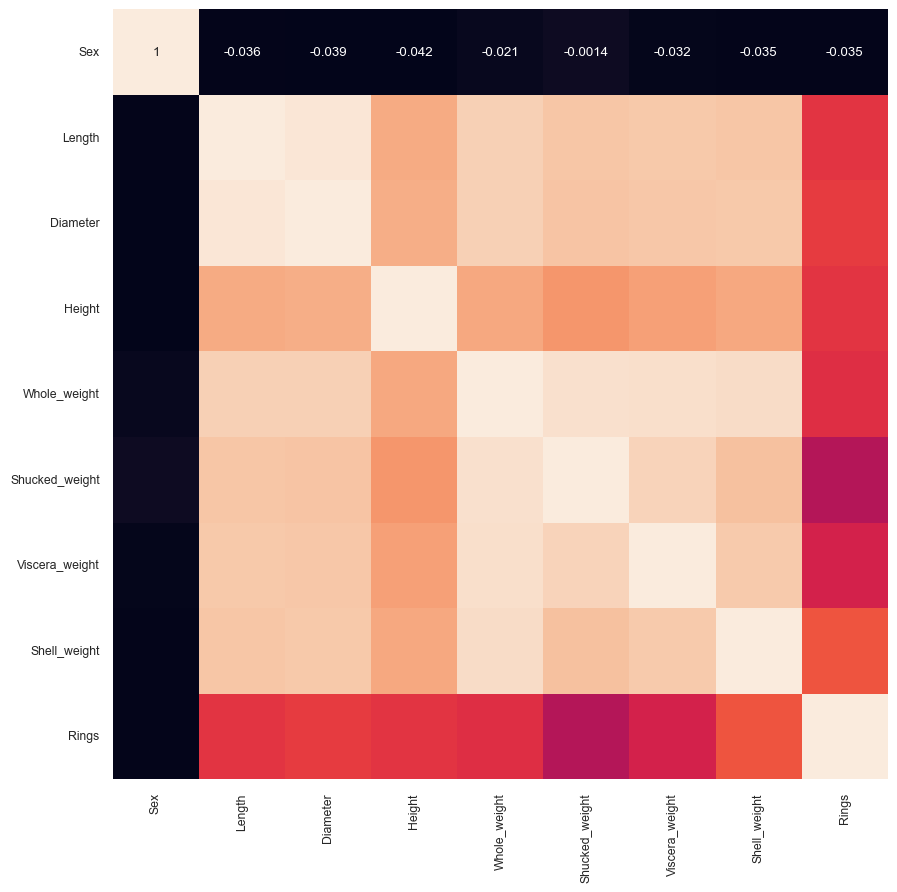

In [25]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# Rings와 가장 상관관계가 큰 건 Shell_weight

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X와 y 생성

In [27]:
X = df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [28]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


## LR

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

평균제곱근오차 5.0625379540952355


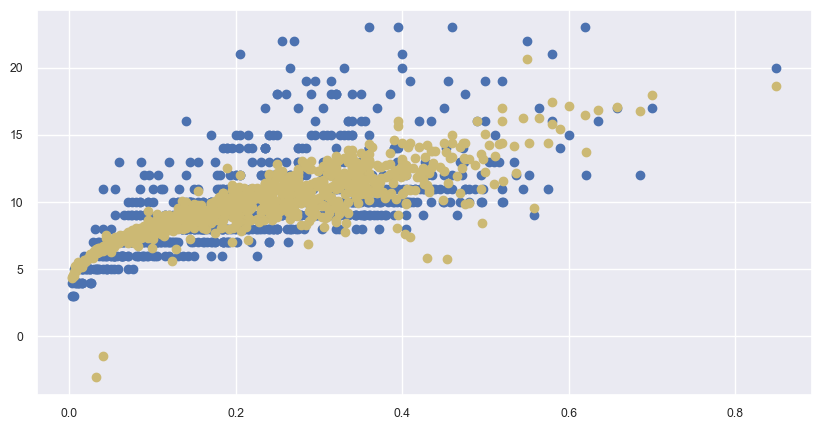

In [31]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

## DT

In [32]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 10.338516746411484


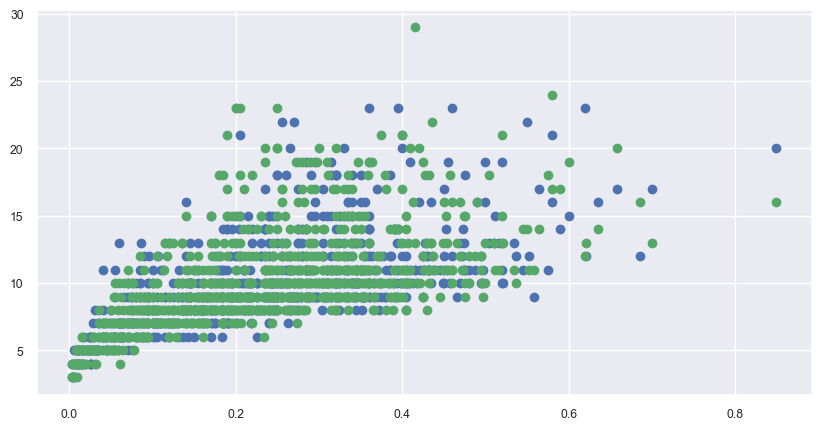

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], dy_preds, c='g', label='dy_preds')
plt.show()

## RF

In [34]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.0567557416267945


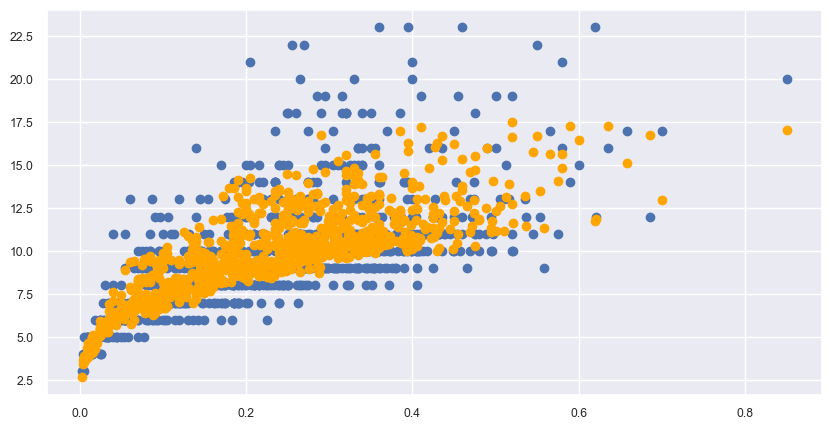

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show() 

## SVM

In [36]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.6081268544722604


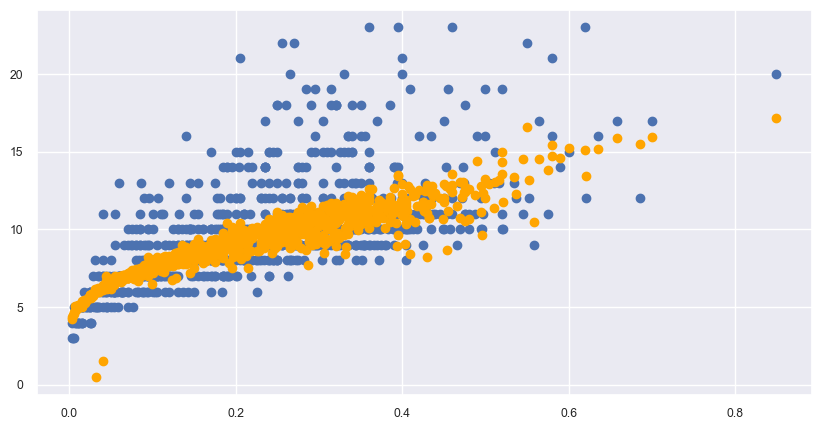

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Shell_weight'], y_test, label='y_test')
plt.scatter(X_test['Shell_weight'], ry_preds, c='orange', label='ry_preds')

plt.show() 

# 딥러닝 분류

In [38]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [39]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

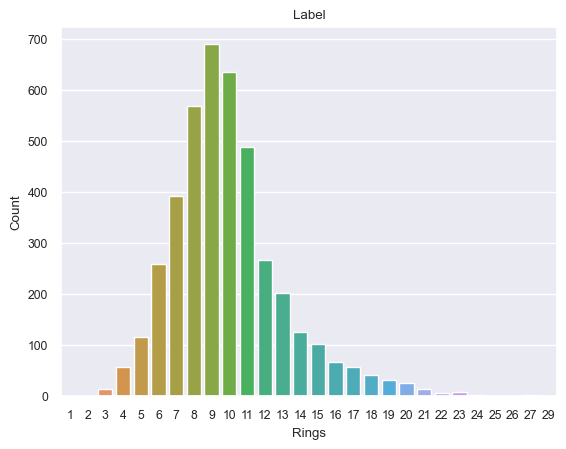

In [40]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Label")

In [41]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [42]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [43]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [44]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [45]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [46]:
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

원-핫 인코딩

In [47]:
Y = pd.get_dummies(y).values

딥러닝 입력을 위해 Numpy로 변환

In [48]:
X = X.values
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [49]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [50]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [52]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(128,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(28,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,412 (48.48 KB)

 Trainable params: 12,412 (48.48 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))



y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1320 - loss: 2.9496 - val_accuracy: 0.1555 - val_loss: 2.4944
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1960 - loss: 2.3844 - val_accuracy: 0.1890 - val_loss: 2.3271
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2293 - loss: 2.2343 - val_accuracy: 0.2344 - val_loss: 2.2117
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2437 - loss: 2.1658 - val_accuracy: 0.2715 - val_loss: 2.1495
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2529 - loss: 2.0923 - val_accuracy: 0.2476 - val_loss: 2.1172
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2550 - loss: 2.0774 - val_accuracy: 0.2380 - val_loss: 2.1055
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2427 - loss: 2.0393 - val_accuracy: 0.2572 - val_loss: 2.0398
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2578 - loss: 2.0179 - val_accuracy: 0.

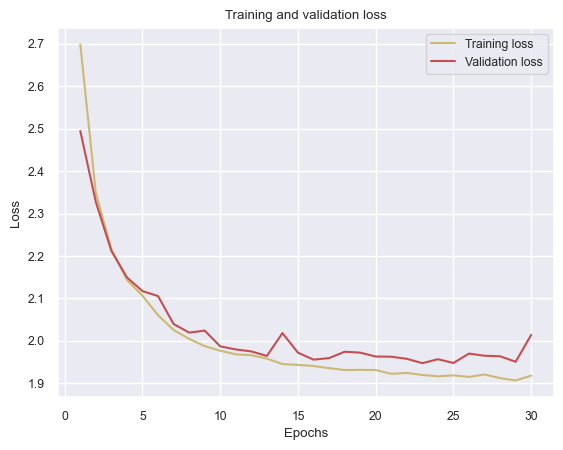

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

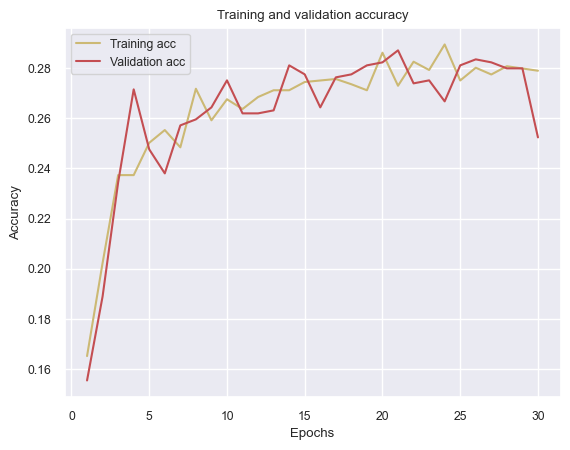

In [55]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [56]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         5
           3       0.24      0.36      0.29        11
           4       0.34      0.30      0.32        33
           5       0.31      0.11      0.16        47
           6       0.39      0.35      0.37        98
           7       0.35      0.49      0.41       113
           8       0.37      0.11      0.17       127
           9       0.15      0.26      0.19       107
          10       0.25      0.48      0.33        95
          11       0.00      0.00      0.00        66
          12       0.14      0.36      0.20        39
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        18
          15       0.10      0.07      0.08        14
          16       0.00      0.00      0.00        10
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         8
          19       0.00    

# 딥러닝 회귀

In [57]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
X = df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [60]:
y = df['Rings']
y.head()

id
0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

원-핫 인코딩

In [61]:
Y = pd.get_dummies(y).values

딥러닝 입력을 위한 Numpy로 변환

In [62]:
X = X.values
X

array([[2.    , 0.455 , 0.365 , ..., 0.2245, 0.101 , 0.15  ],
       [2.    , 0.35  , 0.265 , ..., 0.0995, 0.0485, 0.07  ],
       [0.    , 0.53  , 0.42  , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [2.    , 0.6   , 0.475 , ..., 0.5255, 0.2875, 0.308 ],
       [0.    , 0.625 , 0.485 , ..., 0.531 , 0.261 , 0.296 ],
       [2.    , 0.71  , 0.555 , ..., 0.9455, 0.3765, 0.495 ]])

In [63]:
y

id
0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [64]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [66]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((3341, 8), (3341, 28), (836, 8), (836, 28))

In [67]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(64,input_shape=(8,),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0345 - mse: 0.0345 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

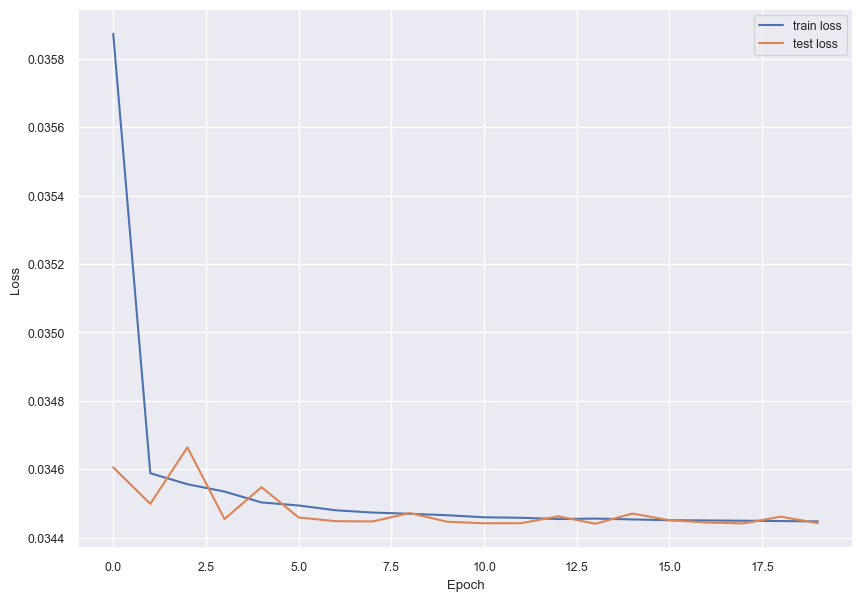

In [69]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mse: 0.0344 


[0.03444230556488037, 0.03444230556488037]